In [1]:
import libgp
import time
import numpy as np

In [2]:
# Generate random data with 5 columns and 1000 rows
np.random.seed(42)  # for reproducibility

def generate_random_data(num_samples):
    """Generate random data for testing."""
    X = np.random.randn(num_samples, 5)  # Input features
    y = 2.0 * np.sin(X[:, 0]) + 0.5 * X[:, 1]**2 + 1.5 * X[:, 2] + 0.1 * X[:, 3] * X[:, 4] + np.random.normal(0, 0.1, num_samples)
    return X, y

X, y = generate_random_data(1000)

print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")
print("\nFirst few rows of the data:")
print("X[:5] =")
print(X[:5])
print("\ny[:5] =")
print(y[:5])

Input shape: (1000, 5)
Output shape: (1000,)

First few rows of the data:
X[:5] =
[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
 [-0.23413696  1.57921282  0.76743473 -0.46947439  0.54256004]
 [-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783]
 [-0.56228753 -1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819 -0.54438272]]

y[:5] =
[ 1.8561318   1.86328828 -0.27215957  0.01327014  2.26657769]


In [3]:
def test_runtime(n, batch=False):
    X_train, y_train = generate_random_data(n)
    gp = libgp.GaussianProcess(5, "CovSum(CovSEiso, CovNoise)")
    params = np.array([0.0, 0.0, -1.0])  # log-space parameters
    gp.set_loghyper(params)
    time_start = time.time()
    if batch:
        gp.add_patterns(X_train, y_train)
    else:
        for x_i, y_i in zip(X_train, y_train):
            gp.add_pattern(x_i, y_i)
    time_end = time.time()
    duration = time_end - time_start
    return duration

In [4]:
results = []
m = 8
grid = np.arange(1000, m * 1000 + 1, 1000), [True, False]
for n, batch in np.array(np.meshgrid(*grid)).T.reshape(-1, len(grid)):

    runtime = test_runtime(n, batch)
    results.append({
        'runtime': runtime,
        'n': n,
        'batch': batch
    })
    print(f"n = {n}, batch = {batch}: {runtime:.4f} seconds")

n = 1000, batch = 1: 0.0204 seconds
n = 1000, batch = 0: 0.0329 seconds
n = 2000, batch = 1: 0.1342 seconds
n = 2000, batch = 0: 0.2692 seconds
n = 3000, batch = 1: 0.3356 seconds
n = 3000, batch = 0: 1.0662 seconds
n = 4000, batch = 1: 0.7421 seconds
n = 4000, batch = 0: 2.7341 seconds
n = 5000, batch = 1: 1.4298 seconds
n = 5000, batch = 0: 4.8557 seconds
n = 6000, batch = 1: 2.3359 seconds
n = 6000, batch = 0: 8.2846 seconds
n = 7000, batch = 1: 3.7000 seconds
n = 7000, batch = 0: 13.1738 seconds
n = 8000, batch = 1: 5.3995 seconds
n = 8000, batch = 0: 19.3923 seconds


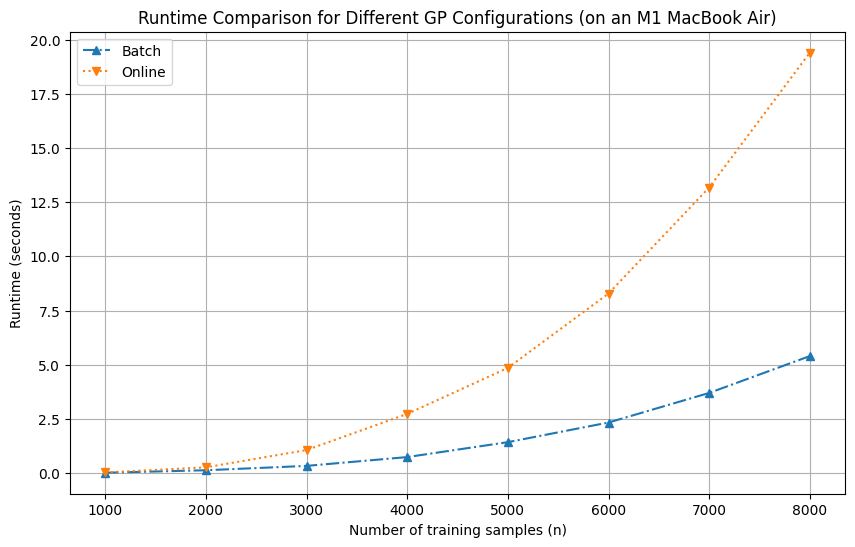

In [5]:
import matplotlib.pyplot as plt

# Create lists to store data for each combination
n_values = sorted(list(set(result['n'] for result in results)))

# Create dictionaries to store runtimes for each combination
runtimes = {
    (False, True): [], # compute_variance=False, batch=True
    (False, False): [] # compute_variance=False, batch=False
}

# Organize data by combination
for n in n_values:
    for combo in runtimes.keys():
        compute_var, batch_mode = combo
        runtime = next(
            r['runtime'] for r in results 
            if r['n'] == n and 
            r['batch'] == batch_mode)
        runtimes[combo].append(runtime)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each combination with different line styles
styles = {
    (False, True): {'label': 'Batch', 'linestyle': '-.', 'marker': '^'},
    (False, False): {'label': 'Online', 'linestyle': ':', 'marker': 'v'}
}

for combo, runtime_values in runtimes.items():
    plt.plot(n_values, runtime_values, **styles[combo])

plt.xlabel('Number of training samples (n)')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Comparison for Different GP Configurations (on an M1 MacBook Air)')
plt.grid(True)
plt.legend()
plt.show()